In [7]:
# ====================================================================
# 08e_Demand_Score_Calculation_and_Aggregation.py
# ====================================================================

# --------------------------------------------------------------------
# 1. SETUP AND LOAD CLEAN DATA
# --------------------------------------------------------------------
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

print("Starting Demand Score Calculation and Aggregation...")

Starting Demand Score Calculation and Aggregation...


In [8]:
# Define the path to the clean data files created by notebook 08c
PROCESSED_DATA_DIR = Path("/Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/data/processed/")

# Define the output directory for the analysis files
ANALYSIS_DATA_DIR = Path("/Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/data/analysis_outputs/")
ANALYSIS_DATA_DIR.mkdir(exist_ok=True) # Ensure the directory exists

# Load the clean, corrected layers
try:
    lsoa_sw = gpd.read_file(PROCESSED_DATA_DIR / "southwest_lsoa.gpkg")
    msoa_sw = gpd.read_file(PROCESSED_DATA_DIR / "southwest_msoa.gpkg")
    lad_sw = gpd.read_file(PROCESSED_DATA_DIR / "southwest_lad.gpkg")
    print(f"✓ Clean data loaded successfully from {PROCESSED_DATA_DIR}")
except Exception as e:
    raise FileNotFoundError(f"ERROR: Could not load clean data. Ensure 08c ran successfully. Details: {e}")

✓ Clean data loaded successfully from /Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/data/processed



Calculating a normalized demand score from IMD Rank...
✓ 'demand_score' column created.
  - Visualizing the distribution of the new demand score.


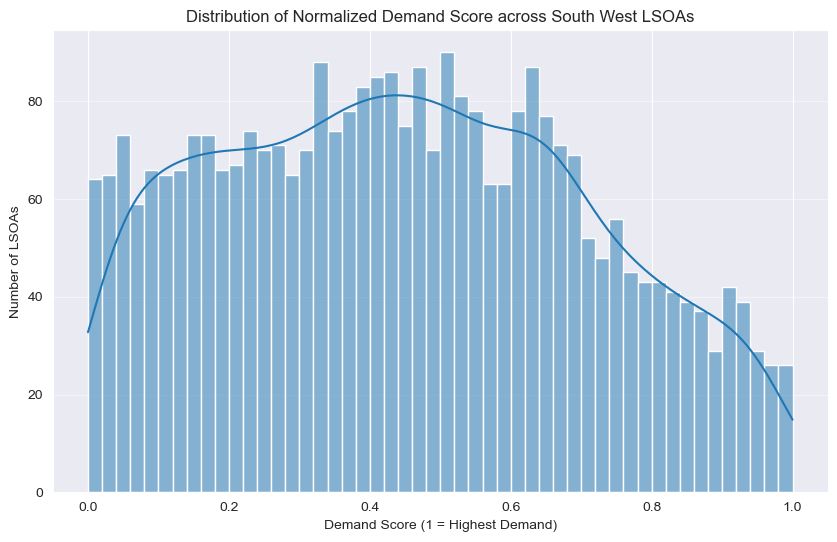

In [9]:
# --------------------------------------------------------------------
# 2. CALCULATE A NORMALIZED DEMAND SCORE
# --------------------------------------------------------------------
print("\nCalculating a normalized demand score from IMD Rank...")

# Rationale: IMD Rank is a measure where a lower number indicates higher deprivation.
# We will create a "demand_score" from 0 to 1, where 1 represents the highest potential demand.
# We use min-max normalization: (x - min) / (max - min).
# To invert the rank, we subtract the result from 1.

min_rank = lsoa_sw['imd_rank'].min()
max_rank = lsoa_sw['imd_rank'].max()

lsoa_sw['demand_score'] = 1 - ( (lsoa_sw['imd_rank'] - min_rank) / (max_rank - min_rank) )

print("✓ 'demand_score' column created.")

# --- Visualize the new score's distribution ---
print("  - Visualizing the distribution of the new demand score.")
plt.figure(figsize=(10, 6))
sns.histplot(lsoa_sw['demand_score'], kde=True, bins=50)
plt.title('Distribution of Normalized Demand Score across South West LSOAs')
plt.xlabel('Demand Score (1 = Highest Demand)')
plt.ylabel('Number of LSOAs')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [10]:
# --------------------------------------------------------------------
# 3. AGGREGATE DEMAND SCORE TO MSOA AND LAD LEVELS
# --------------------------------------------------------------------
print("\nAggregating demand score to MSOA and LAD levels...")

# --- IMPORTANT METHODOLOGICAL NOTE ---
# A simple average of LSOA scores assumes each LSOA contributes equally.
# A more accurate aggregation would be weighted by population (i.e., a high-demand
# LSOA with more people has a greater impact on its MSOA's score).
# As we do not have population data in this dataset, we will proceed with an
# unweighted mean to demonstrate the technique, but this is a key limitation.

# Calculate the mean demand score at the MSOA level
msoa_demand = lsoa_sw.groupby('msoa')['demand_score'].mean().reset_index()

# Calculate the mean demand score at the LAD level
lad_demand = lsoa_sw.groupby('lad')['demand_score'].mean().reset_index()

# Merge the aggregated scores back into the MSOA and LAD GeoDataFrames
msoa_sw = msoa_sw.merge(msoa_demand, on='msoa', how='left')
lad_sw = lad_sw.merge(lad_demand, on='lad', how='left')

print("✓ Demand scores successfully aggregated and merged.")



Aggregating demand score to MSOA and LAD levels...
✓ Demand scores successfully aggregated and merged.


Generating choropleth maps of aggregated demand...


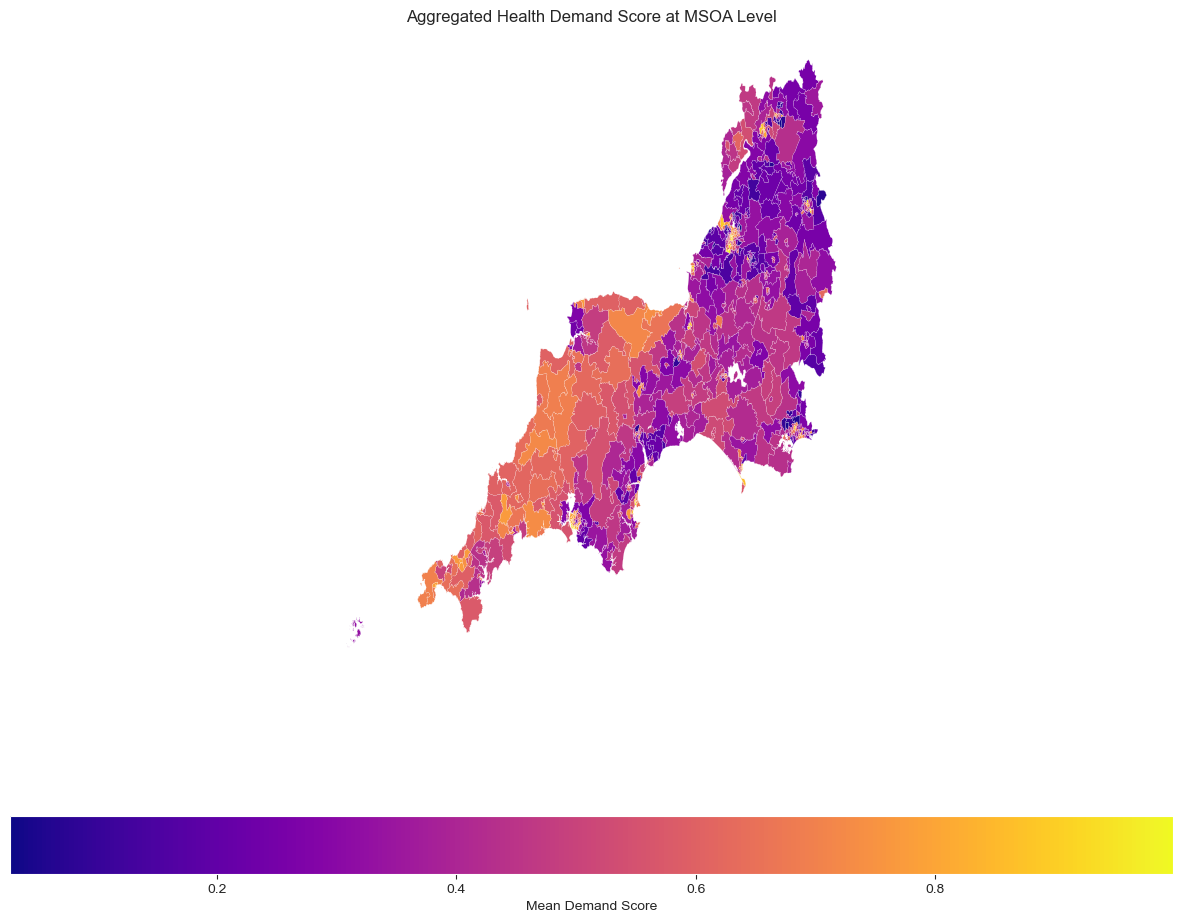

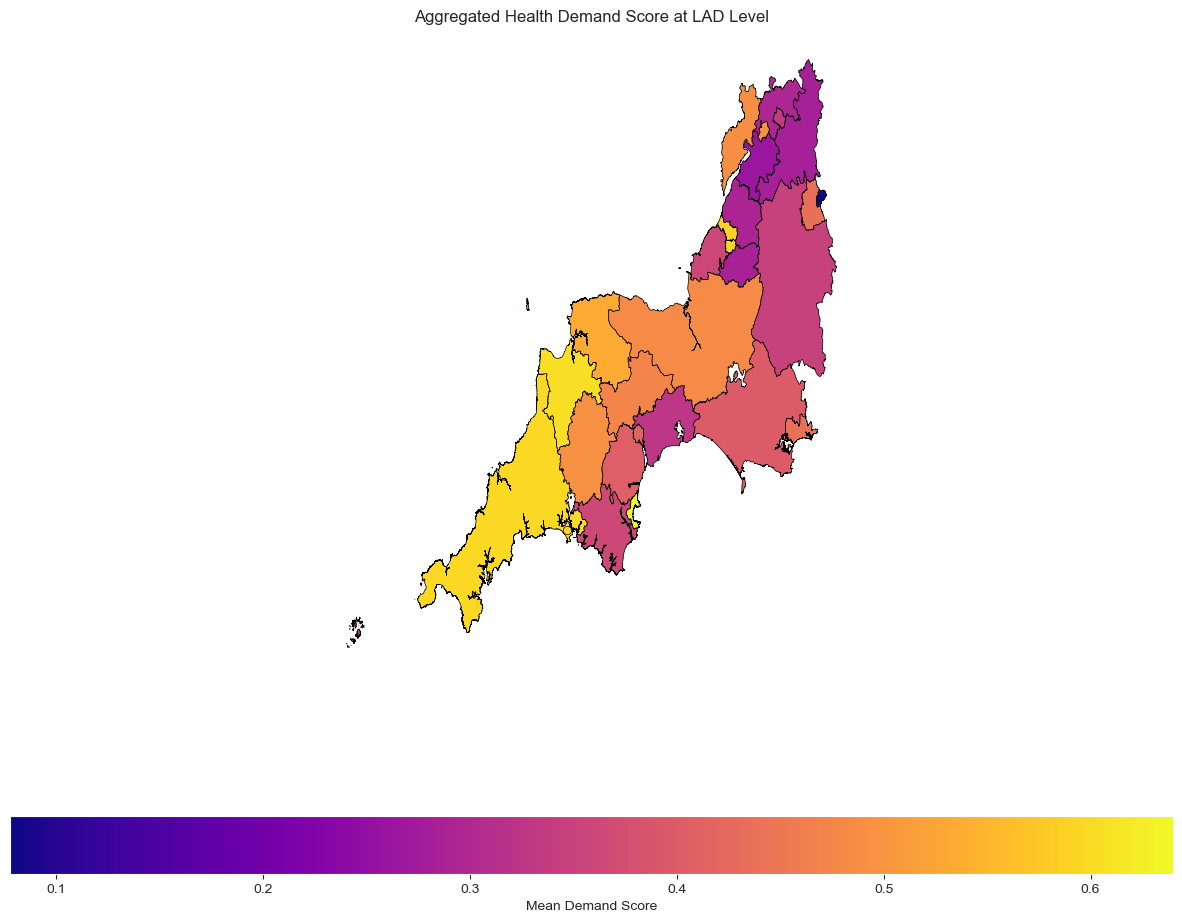

In [11]:
# --------------------------------------------------------------------
# 4. VISUALIZE AGGREGATED DEMAND
# --------------------------------------------------------------------
print("Generating choropleth maps of aggregated demand...")

# --- MSOA Level Map ---
fig, ax1 = plt.subplots(1, 1, figsize=(15, 12))
msoa_sw.plot(column='demand_score', cmap='plasma', linewidth=0.1, ax=ax1, legend=True,
             legend_kwds={'label': "Mean Demand Score", 'orientation': "horizontal"})
ax1.set_title('Aggregated Health Demand Score at MSOA Level')
ax1.axis('off')
plt.show()

# --- LAD Level Map ---
fig, ax2 = plt.subplots(1, 1, figsize=(15, 12))
lad_sw.plot(column='demand_score', cmap='plasma', linewidth=0.5, edgecolor='black', ax=ax2, legend=True,
            legend_kwds={'label': "Mean Demand Score", 'orientation': "horizontal"})
ax2.set_title('Aggregated Health Demand Score at LAD Level')
ax2.axis('off')
plt.show()

In [12]:
# --------------------------------------------------------------------
# 5. SAVE THE ENRICHED LAYERS
# --------------------------------------------------------------------
print("\nSaving layers enriched with demand scores...")

# Define output file paths
lsoa_out_path = ANALYSIS_DATA_DIR / "southwest_lsoa_demand.gpkg"
msoa_out_path = ANALYSIS_DATA_DIR / "southwest_msoa_demand.gpkg"
lad_out_path = ANALYSIS_DATA_DIR / "southwest_lad_demand.gpkg"

# Save each file
lsoa_sw.to_file(lsoa_out_path, driver="GPKG")
msoa_sw.to_file(msoa_out_path, driver="GPKG")
lad_sw.to_file(lad_out_path, driver="GPKG")

print(f"✓ Saved LSOA layer to: {lsoa_out_path}")
print(f"✓ Saved MSOA layer to: {msoa_out_path}")
print(f"✓ Saved LAD layer to: {lad_out_path}")
print("\nProcess complete.")


Saving layers enriched with demand scores...
✓ Saved LSOA layer to: /Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/data/analysis_outputs/southwest_lsoa_demand.gpkg
✓ Saved MSOA layer to: /Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/data/analysis_outputs/southwest_msoa_demand.gpkg
✓ Saved LAD layer to: /Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/data/analysis_outputs/southwest_lad_demand.gpkg

Process complete.
